In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

Note: Model design with binning of "APPLICATION_TYPE" and "CLASSIFICATION"

In [2]:
# Import our input dataset
charity_df = pd.read_csv('Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the "EIN" & "NAME" columns
charity_cleaned_df = charity_df.drop(columns=["EIN","NAME"], axis=1)
charity_cleaned_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
charity_cleaned_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Generate our categorical variable list
charity_cat = charity_cleaned_df.dtypes[charity_cleaned_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Check the number of unique values in each column
charity_cleaned_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [7]:
# Print out the APPLICATION_TYPE value counts
application_counts = charity_cleaned_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

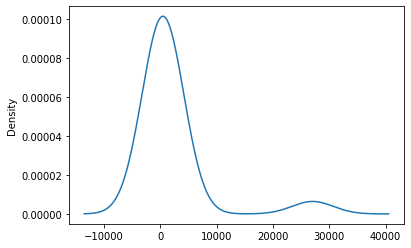

In [8]:
# Visualize the value counts
application_counts.plot.density()

In [9]:
# Determine which values to replace for bucketing
replace_applications = list(application_counts[application_counts < 100].index)

In [10]:
# Replace in DataFrame
for application in replace_applications:
    charity_cleaned_df.APPLICATION_TYPE = charity_cleaned_df.APPLICATION_TYPE.replace(application,"Other")

In [11]:
# Check to make sure bucketing was successful
charity_cleaned_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Print out the CLASSIFICATION value counts
classification_counts = charity_cleaned_df.CLASSIFICATION.value_counts()
classification_counts.head(30)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
Name: CLASSIFICATION, dtype: int64

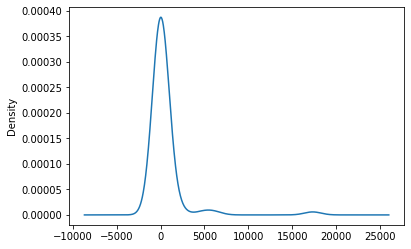

In [13]:
# Visualize the value counts
classification_counts.plot.density()

In [14]:
# Determine which values to replace for bucketing
replace_classifications = list(classification_counts[classification_counts < 100].index)

In [15]:
# Replace in DataFrame
for classification in replace_classifications:
    charity_cleaned_df.CLASSIFICATION = charity_cleaned_df.CLASSIFICATION.replace(classification,"Other")

In [16]:
# Check to make sure bucketing was successful
charity_cleaned_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [17]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [18]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_cleaned_df[charity_cat]))
encode_df.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
charity_cleaned_df = charity_cleaned_df.merge(encode_df,left_index=True, right_index=True)
charity_cleaned_df = charity_cleaned_df.drop(charity_cat,1)
charity_cleaned_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Split our preprocessed data into our target and features arrays
y = charity_cleaned_df["IS_SUCCESSFUL"].values
X = charity_cleaned_df.drop(["IS_SUCCESSFUL"],1).values

In [22]:
X

array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [23]:
len(X[0])

50

In [24]:
len(X)

34299

In [25]:
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
len(y)

34299

In [27]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [28]:
len(X_train)

25724

In [29]:
len(X_train[0])

50

In [30]:
len(y_train)

25724

In [31]:
len(X_test)

8575

In [32]:
len(X_test[0])

50

In [33]:
len(y_test)

8575

In [34]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [35]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [36]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
len(X_train_scaled[0])

50

# Model-1

In [38]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 607
Trainable params: 607
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_model = nn_1.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 138us/sample - loss: 0.5914 - accuracy: 0.7133
Epoch 2/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5633 - accuracy: 0.7276
Epoch 3/50
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5585 - accuracy: 0.7298
Epoch 4/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5561 - accuracy: 0.7305
Epoch 5/50
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5545 - accuracy: 0.7313
Epoch 6/50
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5529 - accuracy: 0.7329
Epoch 7/50
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5520 - accuracy: 0.7324
Epoch 8/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5507 - accuracy: 0.7336
Epoch 9/50
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5494 - accuracy: 0.7335
Epoch 10/50
2

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 1s - loss: 0.5532 - accuracy: 0.7272
Loss: 0.5532226133277048, Accuracy: 0.7272303104400635


# Model-2

In [42]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 6

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 659
Trainable params: 659
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
fit_model = nn_2.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 3s 107us/sample - loss: 0.5890 - accuracy: 0.7091
Epoch 2/50
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5572 - accuracy: 0.7271
Epoch 3/50
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5530 - accuracy: 0.7287
Epoch 4/50
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5511 - accuracy: 0.7296
Epoch 5/50
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5499 - accuracy: 0.7308
Epoch 6/50
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5486 - accuracy: 0.7316
Epoch 7/50
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5486 - accuracy: 0.7321
Epoch 8/50
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5474 - accuracy: 0.7320
Epoch 9/50
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5471 - accuracy: 0.7326
Epoch 10/50
2

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5505 - accuracy: 0.7276
Loss: 0.5504939567521432, Accuracy: 0.727580189704895


# Model-3

In [46]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 679
Trainable params: 679
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
fit_model = nn_3.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 97us/sample - loss: 0.6103 - accuracy: 0.6862
Epoch 2/50
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5666 - accuracy: 0.7190
Epoch 3/50
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5595 - accuracy: 0.7261
Epoch 4/50
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5554 - accuracy: 0.7292
Epoch 5/50
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5526 - accuracy: 0.7291
Epoch 6/50
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5515 - accuracy: 0.7299
Epoch 7/50
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5499 - accuracy: 0.7313
Epoch 8/50
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5490 - accuracy: 0.7312
Epoch 9/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5484 - accuracy: 0.7315
Epoch 10/50
25

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5512 - accuracy: 0.7258
Loss: 0.5511872530400579, Accuracy: 0.7258309125900269


In [50]:
# Train the model
fit_model = nn_3.fit(X_train_scaled,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5413 - accuracy: 0.7366
Epoch 2/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5415 - accuracy: 0.7376
Epoch 3/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5408 - accuracy: 0.7376
Epoch 4/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5415 - accuracy: 0.7374
Epoch 5/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5411 - accuracy: 0.7376
Epoch 6/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5413 - accuracy: 0.7372
Epoch 7/100
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5410 - accuracy: 0.7379
Epoch 8/100
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5406 - accuracy: 0.7371s - loss: 0.5428 - accuracy: 0.
Epoch 9/100
25724/25724 [==============================] - 1s 41us/sample - loss: 

25724/25724 [==============================] - 1s 56us/sample - loss: 0.5387 - accuracy: 0.7375
Epoch 75/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5389 - accuracy: 0.7388
Epoch 76/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5385 - accuracy: 0.7387
Epoch 77/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5388 - accuracy: 0.7387
Epoch 78/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5385 - accuracy: 0.7388
Epoch 79/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5387 - accuracy: 0.7376s - loss: 0.5341 - 
Epoch 80/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5385 - accuracy: 0.7385
Epoch 81/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5385 - accuracy: 0.7383
Epoch 82/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5385 - accuracy: 0.7384
Epoch 83/100


In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5521 - accuracy: 0.7254
Loss: 0.5520622838064811, Accuracy: 0.7253644466400146



Note: Model design with binning of "CLASSIFICATION"

In [52]:
# Import our input dataset
charity_df = pd.read_csv('Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [53]:
# Drop the "EIN" & "NAME" columns
charity_cleaned_2 = charity_df.drop(columns=["EIN","NAME"], axis=1)
charity_cleaned_2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [54]:
# Generate our categorical variable list
charity_cat_1 = charity_cleaned_2.dtypes[charity_cleaned_2.dtypes == "object"].index.tolist()
charity_cat_1

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [55]:
# Check the number of unique values in each column
charity_cleaned_2[charity_cat_1].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [56]:
# Print out the CLASSIFICATION value counts
classification_counts_1 = charity_cleaned_2.CLASSIFICATION.value_counts()
classification_counts_1.head(30)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
Name: CLASSIFICATION, dtype: int64

In [57]:
# Determine which values to replace for bucketing
replace_classifications_1 = list(classification_counts_1[classification_counts_1 < 100].index)

In [58]:
# Replace in DataFrame
for classification in replace_classifications_1:
    charity_cleaned_2.CLASSIFICATION = charity_cleaned_2.CLASSIFICATION.replace(classification,"Other")

In [59]:
# Check to make sure bucketing was successful
charity_cleaned_2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [60]:
# Create the OneHotEncoder instance
enc2 = OneHotEncoder(sparse=False)

In [61]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_2 = pd.DataFrame(enc2.fit_transform(charity_cleaned_2[charity_cat_1]))
encode_2.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
# Add the encoded variable names to the DataFrame
encode_2.columns = enc2.get_feature_names(charity_cat_1)
encode_2.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
# Merge one-hot encoded features and drop the originals
charity_cleaned_3 = charity_cleaned_2.merge(encode_2,left_index=True, right_index=True)
charity_cleaned_3 = charity_cleaned_3.drop(charity_cat_1,1)
charity_cleaned_3.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
# Split our preprocessed data into our target and features arrays
y = charity_cleaned_3["IS_SUCCESSFUL"].values
X = charity_cleaned_3.drop(["IS_SUCCESSFUL"],1).values

In [65]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [66]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [67]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [68]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [69]:
len(X_train_scaled[0])

57

# Model-4

In [70]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 12
# hidden_nodes_layer3 = 8

nn_4 = tf.keras.models.Sequential()

# First hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                696       
_________________________________________________________________
dense_12 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the model
nn_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
# Train the model
fit_model = nn_4.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5903 - accuracy: 0.7109
Epoch 2/50
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5587 - accuracy: 0.7283
Epoch 3/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5540 - accuracy: 0.7302
Epoch 4/50
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5517 - accuracy: 0.7318
Epoch 5/50
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5502 - accuracy: 0.7326
Epoch 6/50
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5490 - accuracy: 0.7336
Epoch 7/50
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5482 - accuracy: 0.7331
Epoch 8/50
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5478 - accuracy: 0.7344
Epoch 9/50
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5469 - accuracy: 0.7340
Epoch 10/50
25

In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5508 - accuracy: 0.7266
Loss: 0.5507525352277839, Accuracy: 0.7266472578048706


# Model-5

In [74]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 8

nn_5 = tf.keras.models.Sequential()

# First hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                696       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 923
Trainable params: 923
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compile the model
nn_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
# Train the model
fit_model = nn_5.fit(X_train_scaled,y_train,epochs=75)

Train on 25724 samples
Epoch 1/75
25724/25724 [==============================] - 1s 58us/sample - loss: 0.6028 - accuracy: 0.6948
Epoch 2/75
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5604 - accuracy: 0.7257
Epoch 3/75
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5544 - accuracy: 0.7284
Epoch 4/75
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5512 - accuracy: 0.7316
Epoch 5/75
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5493 - accuracy: 0.7322
Epoch 6/75
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5482 - accuracy: 0.7311
Epoch 7/75
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5476 - accuracy: 0.7329
Epoch 8/75
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5465 - accuracy: 0.7330
Epoch 9/75
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5466 - accuracy: 0.7333
Epoch 10/75
25

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5537 - accuracy: 0.7259
Loss: 0.5537094553218986, Accuracy: 0.7259474992752075


# Model-6

In [78]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 8

nn_6 = tf.keras.models.Sequential()

# First hidden layer
nn_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_6.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                696       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 923
Trainable params: 923
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile the model
nn_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [80]:
# Train the model
fit_model = nn_6.fit(X_train_scaled,y_train,epochs=75)

Train on 25724 samples
Epoch 1/75
25724/25724 [==============================] - 2s 88us/sample - loss: 0.6545 - accuracy: 0.7052s - loss: 0.6769 - accura
Epoch 2/75
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5773 - accuracy: 0.7238
Epoch 3/75
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5648 - accuracy: 0.7274
Epoch 4/75
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5593 - accuracy: 0.7288
Epoch 5/75
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5585 - accuracy: 0.7286
Epoch 6/75
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5567 - accuracy: 0.7292
Epoch 7/75
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5556 - accuracy: 0.7297
Epoch 8/75
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5545 - accuracy: 0.7314
Epoch 9/75
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5561 - accura

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5545 - accuracy: 0.7261
Loss: 0.5545304873733409, Accuracy: 0.726064145565033


# Model-7

In [93]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8

nn_7 = tf.keras.models.Sequential()

# First hidden layer
nn_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 24)                1392      
_________________________________________________________________
dense_23 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model
nn_7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [95]:
# Train the model
fit_model = nn_7.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5824 - accuracy: 0.7126
Epoch 2/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5563 - accuracy: 0.7284
Epoch 3/50
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5512 - accuracy: 0.7315
Epoch 4/50
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5486 - accuracy: 0.7327
Epoch 5/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5474 - accuracy: 0.7327
Epoch 6/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5457 - accuracy: 0.7331
Epoch 7/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5450 - accuracy: 0.7348
Epoch 8/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5450 - accuracy: 0.7343
Epoch 9/50
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5444 - accuracy: 0.7345
Epoch 10/50
25

In [96]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5506 - accuracy: 0.7272
Loss: 0.5505541829882141, Accuracy: 0.7272303104400635


# Model-8

In [134]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12
# hidden_nodes_layer3 = 8

nn_8 = tf.keras.models.Sequential()

# First hidden layer
nn_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_8.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 24)                1392      
_________________________________________________________________
dense_36 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 13        
Total params: 1,705
Trainable params: 1,705
Non-trainable params: 0
_________________________________________________________________


In [135]:
# Compile the model
nn_8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [136]:
# Train the model
fit_model = nn_8.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5939 - accuracy: 0.7087
Epoch 2/50
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5580 - accuracy: 0.7293
Epoch 3/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5519 - accuracy: 0.7297
Epoch 4/50
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5499 - accuracy: 0.7308
Epoch 5/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5486 - accuracy: 0.7313
Epoch 6/50
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5474 - accuracy: 0.7332
Epoch 7/50
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5468 - accuracy: 0.7326
Epoch 8/50
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5457 - accuracy: 0.7327
Epoch 9/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5453 - accuracy: 0.7339
Epoch 10/50
25

In [137]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5538 - accuracy: 0.7250
Loss: 0.5537756930217799, Accuracy: 0.7250145673751831


Note: Model design with binning of "CLASSIFICATION" and "NAME"


In [167]:
# Import our input dataset
charity_df = pd.read_csv('Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [168]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [169]:
charity_3 = charity_df.copy()
charity_3.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [170]:
# Generate our categorical variable list
charity_cat_3 = charity_3.dtypes[charity_3.dtypes == "object"].index.tolist()
charity_cat_3

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [171]:
# Check the number of unique values in each column
charity_3[charity_cat_3].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [172]:
# Print out the CLASSIFICATION value counts
classification_counts_3 = charity_3.CLASSIFICATION.value_counts()
classification_counts_3.head(30)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
Name: CLASSIFICATION, dtype: int64

In [175]:
# Determine which values to replace for bucketing
replace_classifications_3 = list(classification_counts_3[classification_counts_3 < 100].index)

In [176]:
# Replace in DataFrame
for classification in replace_classifications_3:
    charity_3.CLASSIFICATION = charity_3.CLASSIFICATION.replace(classification,"Other")

In [177]:
# Check to make sure bucketing was successful
charity_3.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [193]:
# Print out the NAME value counts
name_counts_3 = charity_3.NAME.value_counts()
name_counts_3.head(35)

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [196]:
# Determine which values to replace for bucketing
replace_names_3 = list(name_counts_3[name_counts_3 < 100].index)

In [197]:
# Replace in DataFrame
for name in replace_names_3:
    charity_3.NAME = charity_3.NAME.replace(name,"Other")

In [198]:
# Check to make sure bucketing was successful
charity_3.NAME.value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [199]:
# Create the OneHotEncoder instance
enc3 = OneHotEncoder(sparse=False)

In [200]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_3 = pd.DataFrame(enc3.fit_transform(charity_3[charity_cat_3]))
encode_3.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [201]:
# Add the encoded variable names to the DataFrame
encode_3.columns = enc3.get_feature_names(charity_cat_3)
encode_3.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [202]:
# Merge one-hot encoded features and drop the originals
charity_enc_3 = charity_3.merge(encode_3,left_index=True, right_index=True)
charity_enc_3 = charity_enc_3.drop(charity_cat_3,1)
charity_enc_3.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [203]:
# Split our preprocessed data into our target and features arrays
y = charity_enc_3["IS_SUCCESSFUL"].values
X = charity_enc_3.drop(["IS_SUCCESSFUL"],1).values

In [204]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [207]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [208]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [209]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [210]:
len(X_train_scaled[0])

89

# Model-9

In [211]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn_9 = tf.keras.models.Sequential()

# First hidden layer
nn_9.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_9.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_9.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_9.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 24)                2160      
_________________________________________________________________
dense_39 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 13        
Total params: 2,473
Trainable params: 2,473
Non-trainable params: 0
_________________________________________________________________


In [212]:
# Compile the model
nn_9.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [213]:
# Train the model
fit_model = nn_9.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 85us/sample - loss: 0.5301 - accuracy: 0.7327
Epoch 2/50
25724/25724 [==============================] - 2s 64us/sample - loss: 0.4925 - accuracy: 0.7561
Epoch 3/50
25724/25724 [==============================] - 3s 97us/sample - loss: 0.4877 - accuracy: 0.7594
Epoch 4/50
25724/25724 [==============================] - 3s 132us/sample - loss: 0.4854 - accuracy: 0.7596
Epoch 5/50
25724/25724 [==============================] - 2s 85us/sample - loss: 0.4834 - accuracy: 0.7596
Epoch 6/50
25724/25724 [==============================] - 3s 128us/sample - loss: 0.4820 - accuracy: 0.7615
Epoch 7/50
25724/25724 [==============================] - 2s 86us/sample - loss: 0.4811 - accuracy: 0.7621
Epoch 8/50
25724/25724 [==============================] - 2s 80us/sample - loss: 0.4804 - accuracy: 0.7616
Epoch 9/50
25724/25724 [==============================] - 3s 122us/sample - loss: 0.4798 - accuracy: 0.7633
Epoch 10/50

In [214]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_9.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5000 - accuracy: 0.7538
Loss: 0.5000275956715509, Accuracy: 0.7538192272186279


# Model-10

In [215]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8

nn_10 = tf.keras.models.Sequential()

# First hidden layer
nn_10.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_10.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_10.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_10.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_10.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 24)                2160      
_________________________________________________________________
dense_42 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 2,573
Trainable params: 2,573
Non-trainable params: 0
_________________________________________________________________


In [216]:
# Compile the model
nn_10.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [217]:
# Train the model
fit_model = nn_10.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 90us/sample - loss: 0.5293 - accuracy: 0.7306
Epoch 2/50
25724/25724 [==============================] - 2s 71us/sample - loss: 0.4948 - accuracy: 0.7528
Epoch 3/50
25724/25724 [==============================] - 5s 177us/sample - loss: 0.4902 - accuracy: 0.7561 - loss: 0.4596 - accura - ETA: 5s - loss: 0.4588  - ETA: 7s - loss: 0.46
Epoch 4/50
25724/25724 [==============================] - 3s 103us/sample - loss: 0.4864 - accuracy: 0.7599
Epoch 5/50
25724/25724 [==============================] - 3s 98us/sample - loss: 0.4846 - accuracy: 0.7606
Epoch 6/50
25724/25724 [==============================] - 3s 104us/sample - loss: 0.4829 - accuracy: 0.7604
Epoch 7/50
25724/25724 [==============================] - 2s 88us/sample - loss: 0.4821 - accuracy: 0.7612
Epoch 8/50
25724/25724 [==============================] - 3s 115us/sample - loss: 0.4807 - accuracy: 0.7640
Epoch 9/50
25724/25724 [====================

In [218]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_10.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.4978 - accuracy: 0.7511
Loss: 0.4977589841104457, Accuracy: 0.7511370182037354


# Model-11

In [219]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 24
# hidden_nodes_layer3 = 8

nn_11 = tf.keras.models.Sequential()

# First hidden layer
nn_11.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_11.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn_11.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_11.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_11.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 24)                2160      
_________________________________________________________________
dense_46 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 25        
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [220]:
# Compile the model
nn_11.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [221]:
# Train the model
fit_model = nn_11.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5229 - accuracy: 0.7339
Epoch 2/50
25724/25724 [==============================] - 2s 65us/sample - loss: 0.4925 - accuracy: 0.7562
Epoch 3/50
25724/25724 [==============================] - 2s 63us/sample - loss: 0.4878 - accuracy: 0.7575
Epoch 4/50
25724/25724 [==============================] - 3s 106us/sample - loss: 0.4854 - accuracy: 0.7591
Epoch 5/50
25724/25724 [==============================] - 2s 90us/sample - loss: 0.4842 - accuracy: 0.7593
Epoch 6/50
25724/25724 [==============================] - 3s 98us/sample - loss: 0.4823 - accuracy: 0.7613
Epoch 7/50
25724/25724 [==============================] - ETA: 0s - loss: 0.4811 - accuracy: 0.7633 ETA:  - 3s 125us/sample - loss: 0.4813 - accuracy: 0.7630
Epoch 8/50
25724/25724 [==============================] - 3s 110us/sample - loss: 0.4803 - accuracy: 0.7633
Epoch 9/50
25724/25724 [==============================] - 3s 116us/s

In [222]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_11.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5032 - accuracy: 0.7514
Loss: 0.5032284814692795, Accuracy: 0.7513702511787415


# Model-12


In [230]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 36
# hidden_nodes_layer2 = 12

nn_12 = tf.keras.models.Sequential()

# First hidden layer
nn_12.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# # Second hidden layer
# nn_12.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_12.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_12.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 36)                3240      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 37        
Total params: 3,277
Trainable params: 3,277
Non-trainable params: 0
_________________________________________________________________


In [231]:
# Compile the model
nn_12.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [232]:
# Train the model
fit_model = nn_12.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5202 - accuracy: 0.7340
Epoch 2/50
25724/25724 [==============================] - 3s 131us/sample - loss: 0.4942 - accuracy: 0.7548
Epoch 3/50
25724/25724 [==============================] - 2s 82us/sample - loss: 0.4904 - accuracy: 0.7573
Epoch 4/50
25724/25724 [==============================] - 2s 79us/sample - loss: 0.4887 - accuracy: 0.7581
Epoch 5/50
25724/25724 [==============================] - 3s 105us/sample - loss: 0.4862 - accuracy: 0.7605
Epoch 6/50
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4863 - accuracy: 0.7598
Epoch 7/50
25724/25724 [==============================] - 5s 179us/sample - loss: 0.4845 - accuracy: 0.7602
Epoch 8/50
25724/25724 [==============================] - 2s 88us/sample - loss: 0.4843 - accuracy: 0.7597
Epoch 9/50
25724/25724 [==============================] - 3s 99us/sample - loss: 0.4833 - accuracy: 0.7621
Epoch 10/50

In [233]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_12.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.4962 - accuracy: 0.7520
Loss: 0.4962383259871958, Accuracy: 0.7519533634185791


# Model-13

In [234]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
# hidden_nodes_layer2 = 12

nn_13 = tf.keras.models.Sequential()

# First hidden layer
nn_13.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# # Second hidden layer
# nn_12.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_13.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_13.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 24)                2160      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 25        
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________


In [235]:
# Compile the model
nn_13.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [236]:
# Train the model
fit_model = nn_13.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5302 - accuracy: 0.7265
Epoch 2/50
25724/25724 [==============================] - 2s 60us/sample - loss: 0.4965 - accuracy: 0.7496
Epoch 3/50
25724/25724 [==============================] - 2s 63us/sample - loss: 0.4915 - accuracy: 0.7537
Epoch 4/50
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4894 - accuracy: 0.7550
Epoch 5/50
25724/25724 [==============================] - 2s 83us/sample - loss: 0.4871 - accuracy: 0.7567
Epoch 6/50
25724/25724 [==============================] - 2s 79us/sample - loss: 0.4864 - accuracy: 0.7577
Epoch 7/50
25724/25724 [==============================] - 3s 98us/sample - loss: 0.4853 - accuracy: 0.7595
Epoch 8/50
25724/25724 [==============================] - 5s 177us/sample - loss: 0.4844 - accuracy: 0.7598 - - - ETA: 1s - loss: 0.4857 - accuracy:  - ETA: 1s - l
Epoch 9/50
25724/25724 [==============================] - 2s 67u

In [237]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_13.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.4971 - accuracy: 0.7482
Loss: 0.497126927358416, Accuracy: 0.7482215762138367
